# Dealing with Multiclass Data: Covertype Prediction
This notebook outlines the following tree-based and bagging methods: 
- Decision Trees (out of the box and via gridsearchcv + randomsearch) 
- Random Forests (out of the box and via gridsearchcv + randomsearch)

In [1]:
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

#import sklearn.cross_validation as cross_validation
#from sklearn.cross_validation import train_test_split
import sklearn.model_selection as model_selection
from sklearn import linear_model

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

import mca

from sklearn.neighbors import KNeighborsClassifier

from random import sample

In [2]:
import os
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Scripts'

In [3]:
os.chdir('/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Data')
os.getcwd()

'/Users/angelateng/Documents/GitHub/Projects/Covertype_Prediction/Data'

In [4]:
data = open("covtype.data")
data = pd.read_csv("covtype.data", header=None)

In [5]:
data.head()

0    1   2    3    4     5    6    7    8     9   ...  45  46  47  48  \
0  2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   0   

   49  50  51  52  53  54  
0   0   0   0   0   0   5  
1   0   0   0   0   0   5  
2   0   0   0   0   0   2  
3   0   0   0   0   0   2  
4   0   0   0   0   0   5  

[5 rows x 55 columns]

In [6]:
# set column names 
cols = ['elevation', 'aspect', 'slope', 'horizontal_distance_to_hydrology', 
       'vertical_distance_to_hydrology', 'Horizontal_Distance_To_Roadways', 
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 
       'Soil_Type_1',
        'Soil_Type_2',
        'Soil_Type_3',
        'Soil_Type_4',
        'Soil_Type_5',
        'Soil_Type_6',
        'Soil_Type_7',
        'Soil_Type_8',
        'Soil_Type_9',
        'Soil_Type_10',
        'Soil_Type_11',
        'Soil_Type_12',
        'Soil_Type_13',
        'Soil_Type_14',
        'Soil_Type_15',
        'Soil_Type_16',
        'Soil_Type_17',
        'Soil_Type_18',
        'Soil_Type_19',
        'Soil_Type_20',
        'Soil_Type_21',
        'Soil_Type_22',
        'Soil_Type_23',
        'Soil_Type_24',
        'Soil_Type_25',
        'Soil_Type_26',
        'Soil_Type_27',
        'Soil_Type_28',
        'Soil_Type_29',
        'Soil_Type_30',
        'Soil_Type_31',
        'Soil_Type_32',
        'Soil_Type_33',
        'Soil_Type_34',
        'Soil_Type_35',
        'Soil_Type_36',
        'Soil_Type_37',
        'Soil_Type_38',
        'Soil_Type_39',
        'Soil_Type_40', 
       'Cover_Type']
#cols

In [7]:
data.columns = cols
data.head()

elevation  aspect  slope  horizontal_distance_to_hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   vertical_distance_to_hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_32  Soil_Type_33  \
0                                6279  ...             0             0   
1                                6225  ...             0             0   
2                                6121  ...             0             0   
3                                6211  ...             0             0   
4                                6172  ...             0             0   

   Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_39  Soil_Type_40  Cover_Type  
0             0             0           5  
1             0             0           5  
2             0             0           2  
3             0             0           2  
4             0             0           5  

[5 rows x 55 columns]

In [8]:
data.shape

(581012, 55)

In [9]:
data.describe()

elevation         aspect          slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       horizontal_distance_to_hydrology  vertical_distance_to_hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_Type_32  \
count  581012.000000                       581012.000000  ...  581012.000000   
mean      142.528263                         1980.291226  ...       0.090392   
std        38.274529                         1324.195210  ...       0.286743   
min         0.000000                            0.000000  ...       0.000000   
25%       119.000000                         1024.000000  ...       0.000000   
50%       143.000000                         1710.000000  ...       0.000000   
75%       168.000000                         2550.000000  ...       0.000000   
max       254.000000                         7173.000000  ...       1.000000   

        Soil_Type_33   Soil_Type_34   Soil_Type_35   Soil_Type_36  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.077716       0.002773       0.003255       0.000205   
std         0.267725       0.052584       0.056957       0.014310   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        Soil_Type_37   Soil_Type_38   Soil_Type_39   Soil_Type_40  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.000513       0.026803       0.023762       0.015060   
std         0.022641       0.161508       0.152307       0.121791   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Cover_Type  
count  581012.000000  
mean        2.051471  
std         1.396504  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         2.000000  
max         7.000000  

[8 rows x 55 colu

In [10]:
#plotting multiple binary categorical variables?
data.groupby('Cover_Type').describe()

elevation                                                    \
               count         mean         std     min      25%     50%   
Cover_Type                                                               
1           211840.0  3128.644888  157.805543  2466.0  3033.00  3146.0   
2           283301.0  2920.936061  186.579366  2142.0  2794.00  2935.0   
3            35754.0  2394.509845  196.732427  1859.0  2260.25  2404.0   
4             2747.0  2223.939934  102.524587  1988.0  2142.00  2231.0   
5             9493.0  2787.417571   96.594047  2482.0  2732.00  2796.0   
6            17367.0  2419.181897  188.762292  1863.0  2320.00  2428.0   
7            20510.0  3361.928669  106.915301  2868.0  3299.25  3363.0   

                              aspect              ... Soil_Type_39       \
               75%     max     count        mean  ...          75%  max   
Cover_Type                                        ...                     
1           3235.0  3686.0  211840.0  156.138227  ...          0.0  1.0   
2           3042.0  3433.0  283301.0  152.060515  ...          0.0  1.0   
3           2549.0  2899.0   35754.0  176.372490  ...          0.0  0.0   
4           2304.0  2526.0    2747.0  137.139425  ...          0.0  0.0   
5           2857.0  3011.0    9493.0  139.283051  ...          0.0  0.0   
6           2544.0  2900.0   17367.0  180.539068  ...          0.0  0.0   
7           3409.0  3858.0   20510.0  153.236226  ...          1.0  1.0   

           Soil_Type_40                                               
                  count      mean       std  min  25%  50%  75%  max  
Cover_Type                                                            
1              211840.0  0.022781  0.149206  0.0  0.0  0.0  0.0  1.0  
2              283301.0  0.001172  0.034213  0.0  0.0  0.0  0.0  1.0  
3               35754.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
4                2747.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
5                9493.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
6               17367.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0  
7               20510.0  0.175134  0.380091  0.0  0.0  0.0  0.0  1.0  

[7 rows x 432 columns]

In [11]:
#create dummy variables for multiclass predictor
cov_dummy = pd.get_dummies(data['Cover_Type'])
cov_dummy.head()

1  2  3  4  5  6  7
0  0  0  0  0  1  0  0
1  0  0  0  0  1  0  0
2  0  1  0  0  0  0  0
3  0  1  0  0  0  0  0
4  0  0  0  0  1  0  0

In [12]:
df4 = pd.concat([cov_dummy, data], axis = 1)
df4.head()

1  2  3  4  5  6  7  elevation  aspect  slope  ...  Soil_Type_32  \
0  0  0  0  0  1  0  0       2596      51      3  ...             0   
1  0  0  0  0  1  0  0       2590      56      2  ...             0   
2  0  1  0  0  0  0  0       2804     139      9  ...             0   
3  0  1  0  0  0  0  0       2785     155     18  ...             0   
4  0  0  0  0  1  0  0       2595      45      2  ...             0   

   Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_38  Soil_Type_39  Soil_Type_40  Cover_Type  
0             0             0             0           5  
1             0             0             0           5  
2             0             0             0           2  
3             0             0             0           2  
4             0             0             0           5  

[5 rows x 62 columns]

In [13]:
from sklearn import preprocessing
import numpy as np


In [14]:
 df4_column_names = list(df4.columns)
df4_column_names.remove('Cover_Type')
#df4_column_names

In [15]:
# Normalize all columns

x = df4.loc[:, df4.columns != 'Cover_Type'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(data=x_scaled, columns=df4_column_names)
#df_normalized.loc[:,:] = x_scaled

In [16]:
df_normalized.head()

1    2    3    4    5    6    7  elevation    aspect     slope  ...  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368684  0.141667  0.045455  ...   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.365683  0.155556  0.030303  ...   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.472736  0.386111  0.136364  ...   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.463232  0.430556  0.272727  ...   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368184  0.125000  0.030303  ...   

   Soil_Type_31  Soil_Type_32  Soil_Type_33  Soil_Type_34  Soil_Type_35  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_36  Soil_Type_37  Soil_Type_38  Soil_Type_39  Soil_Type_40  
0           0.0           0.0           0.0           0.0           0.0  
1           0.0           0.0           0.0           0.0           0.0  
2           0.0           0.0           0.0           0.0           0.0  
3           0.0           0.0           0.0           0.0           0.0  
4           0.0           0.0           0.0           0.0           0.0  

[5 rows x 61 columns]

In [17]:
#append Y axis babck to this 
df_normalized_w_target = pd.concat([df_normalized, df4['Cover_Type']], axis=1)
df_normalized_w_target.head()

1    2    3    4    5    6    7  elevation    aspect     slope  ...  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368684  0.141667  0.045455  ...   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.365683  0.155556  0.030303  ...   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.472736  0.386111  0.136364  ...   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.463232  0.430556  0.272727  ...   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368184  0.125000  0.030303  ...   

   Soil_Type_32  Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_37  Soil_Type_38  Soil_Type_39  Soil_Type_40  Cover_Type  
0           0.0           0.0           0.0           0.0           5  
1           0.0           0.0           0.0           0.0           5  
2           0.0           0.0           0.0           0.0           2  
3           0.0           0.0           0.0           0.0           2  
4           0.0           0.0           0.0           0.0           5  

[5 rows x 62 columns]

In [18]:
df_normalized_w_target.shape

(581012, 62)

In [19]:
df_dummy = df_normalized_w_target
df_dummy = df_dummy.drop(['Cover_Type'], axis=1)
df_dummy.head()

1    2    3    4    5    6    7  elevation    aspect     slope  ...  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368684  0.141667  0.045455  ...   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.365683  0.155556  0.030303  ...   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.472736  0.386111  0.136364  ...   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.463232  0.430556  0.272727  ...   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368184  0.125000  0.030303  ...   

   Soil_Type_31  Soil_Type_32  Soil_Type_33  Soil_Type_34  Soil_Type_35  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_36  Soil_Type_37  Soil_Type_38  Soil_Type_39  Soil_Type_40  
0           0.0           0.0           0.0           0.0           0.0  
1           0.0           0.0           0.0           0.0           0.0  
2           0.0           0.0           0.0           0.0           0.0  
3           0.0           0.0           0.0           0.0           0.0  
4           0.0           0.0           0.0           0.0           0.0  

[5 rows x 61 columns]

In [20]:
from collections import Counter


from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

print(__doc__)

Using TensorFlow backend.


Automatically created module for IPython interactive environment


In [21]:
RANDOM_STATE = 42

In [22]:
# set target data  and x values
X=df_normalized_w_target[list(df_normalized_w_target.columns)[7:-1]]
print(X.shape)
X.head()

(581012, 54)


elevation    aspect     slope  horizontal_distance_to_hydrology  \
0   0.368684  0.141667  0.045455                          0.184681   
1   0.365683  0.155556  0.030303                          0.151754   
2   0.472736  0.386111  0.136364                          0.191840   
3   0.463232  0.430556  0.272727                          0.173228   
4   0.368184  0.125000  0.030303                          0.109520   

   vertical_distance_to_hydrology  Horizontal_Distance_To_Roadways  \
0                        0.223514                         0.071659   
1                        0.215762                         0.054798   
2                        0.307494                         0.446817   
3                        0.375969                         0.434172   
4                        0.222222                         0.054939   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.870079        0.913386       0.582677   
1       0.866142        0.925197       0.594488   
2       0.921260        0.937008       0.531496   
3       0.937008        0.937008       0.480315   
4       0.866142        0.921260       0.590551   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                            0.875366  ...           0.0           0.0   
1                            0.867838  ...           0.0           0.0   
2                            0.853339  ...           0.0           0.0   
3                            0.865886  ...           0.0           0.0   
4                            0.860449  ...           0.0           0.0   

   Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_38  Soil_Type_39  Soil_Type_40  
0           0.0           0.0           0.0  
1           0.0           0.0           0.0  
2           0.0           0.0           0.0  
3           0.0           0.0           0.0  
4           0.0           0.0           0.0  

[5 rows x 54 columns]

In [23]:
Y=df_normalized_w_target[list(df_normalized_w_target.columns)[-1]]
print(Y.shape)
Y.head()
#Y

(581012,)


0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [24]:
#sample the data, 1000 per output
X, y = make_imbalance(X, Y,
                      sampling_strategy={1: 1000, 2: 1000, 3: 1000, 4:1000, 5:1000, 6:1000, 7:1000},
                      random_state=RANDOM_STATE)

In [25]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=RANDOM_STATE)

In [26]:
print('Training target statistics: {}'.format(Counter(y_train)))
print('Testing target statistics: {}'.format(Counter(y_test)))

Training target statistics: Counter({3: 767, 5: 766, 7: 764, 6: 752, 1: 738, 4: 733, 2: 730})
Testing target statistics: Counter({2: 270, 4: 267, 1: 262, 6: 248, 7: 236, 5: 234, 3: 233})


## Decision Tree

In [27]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.features import RFECV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


from sklearn.tree import DecisionTreeClassifier


In [28]:
clf = DecisionTreeClassifier(random_state=42)

In [29]:
clf = clf.fit(X_train, y_train)

In [30]:
#print("Features:",[list(df_normalized_w_target.columns)[7:-1]])
#print("Num of Features:", fit.n_features_)
#print("Selected Features:", fit.support_)
#print("Feature Ranking:", fit.ranking_)
from pprint import pprint
feature_names = list(df_normalized_w_target.columns)[7:-1]
pprint(dict(zip(feature_names, clf.feature_importances_)))


{'Hillshade_3pm': 0.025521688989605613,
 'Hillshade_9am': 0.06514089675037689,
 'Hillshade_Noon': 0.035283630154485136,
 'Horizontal_Distance_To_Fire_Points': 0.0736460062727714,
 'Horizontal_Distance_To_Roadways': 0.07842210976459574,
 'Soil_Type_1': 0.0017563059773879188,
 'Soil_Type_10': 0.00783927520246036,
 'Soil_Type_11': 0.001597458261351177,
 'Soil_Type_12': 0.008462841945307149,
 'Soil_Type_13': 0.0011290432522333888,
 'Soil_Type_14': 0.0,
 'Soil_Type_15': 0.0,
 'Soil_Type_16': 0.0015809504296398385,
 'Soil_Type_17': 0.00397098640892068,
 'Soil_Type_18': 0.0,
 'Soil_Type_19': 0.001109285869131416,
 'Soil_Type_2': 0.00345404852913302,
 'Soil_Type_20': 0.001231858964094942,
 'Soil_Type_21': 0.00020577506134001705,
 'Soil_Type_22': 0.0017375558054355735,
 'Soil_Type_23': 0.001554075858126616,
 'Soil_Type_24': 0.0005451296621758979,
 'Soil_Type_25': 0.0,
 'Soil_Type_26': 0.0,
 'Soil_Type_27': 0.0,
 'Soil_Type_28': 0.0,
 'Soil_Type_29': 0.0031803648547735915,
 'Soil_Type_3': 0.0151

In [31]:
#feature_list = pd.DataFrame(columns = (data.columns)[:-1])
feature_list = list(df_normalized_w_target.columns)[7:-1]
len(feature_list)

54

In [32]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Decision Tree Model Performance

In [33]:
predictions = dtree.predict(X_test)

In [34]:
from sklearn import metrics
#this is for all the variables
print ("Decision Tree Train Accuracy:", metrics.accuracy_score(y_train, dtree.predict(X_train)))
print ("Decision Tree Test Accuracy:", metrics.accuracy_score(y_test, dtree.predict(X_test)))

Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.7337142857142858


In [35]:
y_pred = dtree.predict(X_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.73


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.59      0.61      0.60       262
           2       0.55      0.51      0.53       270
           3       0.68      0.68      0.68       233
           4       0.91      0.92      0.92       267
           5       0.78      0.82      0.80       234
           6       0.72      0.73      0.72       248
           7       0.90      0.89      0.90       236

    accuracy                           0.73      1750
   macro avg       0.73      0.74      0.74      1750
weighted avg       0.73      0.73      0.73      1750



In [37]:
print(confusion_matrix(y_test,predictions))

[[161  72   0   0   8   1  20]
 [ 79 137   9   1  33  10   1]
 [  0   6 158  17   3  48   1]
 [  0   0  15 245   0   7   0]
 [ 11  19   6   0 193   5   0]
 [  1   7  44   5  10 181   0]
 [ 20   7   0   0   0   0 209]]


In [38]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

features = list(feature_list)
features

['elevation',
 'aspect',
 'slope',
 'horizontal_distance_to_hydrology',
 'vertical_distance_to_hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area_1',
 'Wilderness_Area_2',
 'Wilderness_Area_3',
 'Wilderness_Area_4',
 'Soil_Type_1',
 'Soil_Type_2',
 'Soil_Type_3',
 'Soil_Type_4',
 'Soil_Type_5',
 'Soil_Type_6',
 'Soil_Type_7',
 'Soil_Type_8',
 'Soil_Type_9',
 'Soil_Type_10',
 'Soil_Type_11',
 'Soil_Type_12',
 'Soil_Type_13',
 'Soil_Type_14',
 'Soil_Type_15',
 'Soil_Type_16',
 'Soil_Type_17',
 'Soil_Type_18',
 'Soil_Type_19',
 'Soil_Type_20',
 'Soil_Type_21',
 'Soil_Type_22',
 'Soil_Type_23',
 'Soil_Type_24',
 'Soil_Type_25',
 'Soil_Type_26',
 'Soil_Type_27',
 'Soil_Type_28',
 'Soil_Type_29',
 'Soil_Type_30',
 'Soil_Type_31',
 'Soil_Type_32',
 'Soil_Type_33',
 'Soil_Type_34',
 'Soil_Type_35',
 'Soil_Type_36',
 'Soil_Type_37',
 'Soil_Type_38',
 'Soil_Type_39',
 'Soil_Type_40']

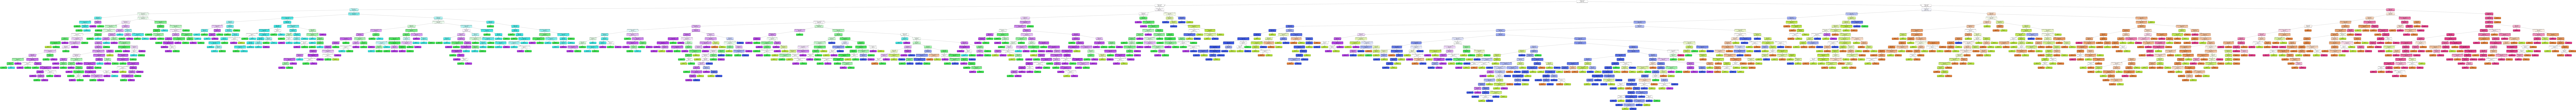

In [41]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)
#export_graphviz(dtree,feature_names=features,filled=True,rounded=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png()) 

# Create DOT data
#dot_data = tree.export_graphviz(clf, out_file=None, 
                                #feature_names=features,  
                                #class_names=np.unique(y))
# Draw graph
#graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
#Image(graph.create_png())
#export_graphviz(dtree, out_file=dot_data,  
               # filled=True, rounded=True,
                #special_characters=True)

#(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

#note: double click the image to expand it 

**Using Decision Tree Classifiers and including all 54 variables, we get an accuracy rate of about 74%. However, because the training accuracy rate is 1.0, we know that this model is overfitting to the data. We will get back to this later, particularly by pruning nodes.**

<div class="alert alert-block alert-danger">
Adding in New Edits from 07/12/19 
</div>

In [39]:
print(f"X_train shape is {X_train.shape}")
print(f"X_test shape is {X_test.shape}")
# print(f"X_validate shape is {X_validate.shape}")
print(f"y_train shape is {y_train.shape}")
# print(f"y_validate shape is {y_validate.shape}")
print(f"y_test shape is {y_test.shape}")

X_train shape is (5250, 54)
X_test shape is (1750, 54)
y_train shape is (5250,)
y_test shape is (1750,)


In [40]:
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    ''' Root mean squared error regression loss
    
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Ground truth (correct) target values.

    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Estimated target values.
    '''
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [41]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

### Decision Tree Parameter Tuning

Sources: 
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
- https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976
- https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb
- https://discuss.analyticsvidhya.com/t/what-does-min-samples-split-means-in-decision-tree/6233/3
- https://github.com/scikit-learn/scikit-learn/issues/8041- 
- https://stackoverflow.com/questions/43708541/python-typeerror-typeerror-not-supported-between-instances-of-nonetype
- https://stackoverflow.com/questions/34889110/random-forest-with-gridsearchcv-error-on-param-grid
- https://stackoverflow.com/questions/48271342/invalid-parameter-clf-for-estimator-pipeline-in-sklearn?rq=1
- https://towardsdatascience.com/decision-trees-a-birds-eye-view-and-an-implementation-c91754f0dcd0 

In [42]:
from sklearn.metrics import accuracy_score
#rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
accuracy_scorer = make_scorer(accuracy_score, greater_is_better=True)

In [92]:
#pipe_tree = make_pipeline(tree.DecisionTreeClassifier(random_state=42))
steps = [('decisiontreeclassifier', dtree)]
steps

[('decisiontreeclassifier',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best'))]

In [86]:
from sklearn.pipeline import Pipeline
pipeline= Pipeline(steps)

In [124]:
parameters = {'DecisionTreeClassifier__max_depth': [1, 2, 4, 8, 16, None], 
              'DecisionTreeClassifier__min_samples_leaf':[1, 10, 20, 50, 100], 
             'DecisionTreeClassifier__min_samples_split': [2,30,40], 
             'DecisionTreeClassifier__random_state': [42]}
parameters

{'DecisionTreeClassifier__max_depth': [1, 2, 4, 8, 16, None],
 'DecisionTreeClassifier__min_samples_leaf': [1, 10, 20, 50, 100],
 'DecisionTreeClassifier__min_samples_split': [2, 30, 40],
 'DecisionTreeClassifier__random_state': [42]}

In [125]:
from sklearn.model_selection import GridSearchCV
dtree_gridsearch = GridSearchCV(estimator=pipeline, param_grid=parameters, 
                                cv=10)

In [126]:
dtree_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('DecisionTreeClassifier',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fraction_

In [127]:
print(dtree_gridsearch.best_score_)

0.7346666666666667


In [100]:
sorted(pipeline.get_params().keys())

['DecisionTreeClassifier',
 'DecisionTreeClassifier__class_weight',
 'DecisionTreeClassifier__criterion',
 'DecisionTreeClassifier__max_depth',
 'DecisionTreeClassifier__max_features',
 'DecisionTreeClassifier__max_leaf_nodes',
 'DecisionTreeClassifier__min_impurity_decrease',
 'DecisionTreeClassifier__min_impurity_split',
 'DecisionTreeClassifier__min_samples_leaf',
 'DecisionTreeClassifier__min_samples_split',
 'DecisionTreeClassifier__min_weight_fraction_leaf',
 'DecisionTreeClassifier__presort',
 'DecisionTreeClassifier__random_state',
 'DecisionTreeClassifier__splitter',
 'memory',
 'steps',
 'verbose']

In [128]:
print(dtree_gridsearch.best_params_)

{'DecisionTreeClassifier__max_depth': 16, 'DecisionTreeClassifier__min_samples_leaf': 1, 'DecisionTreeClassifier__min_samples_split': 2, 'DecisionTreeClassifier__random_state': 42}


In [129]:
dtree_gridsearch.best_estimator_

Pipeline(memory=None,
         steps=[('DecisionTreeClassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=16, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=42,
                                        splitter='best'))],
         verbose=False)

Fitting the tuned tree model to the training data

In [130]:
model_dtree_tweaked = dtree_gridsearch.best_estimator_

In [131]:
model_dtree_tweaked.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('DecisionTreeClassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=16, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=42,
                                        splitter='best'))],
         verbose=False)

In [134]:
y_predicted =model_dtree_tweaked.predict(X_test)
model_dtree_tweaked.score(X_test, y_test)
#root_mean_squared_error(y_test, y_predicted)

0.7234285714285714

In [133]:

print('Accuracy of decision tree classifier on test set: {:.2f}'.format(model_dtree_tweaked.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.72


*I know that the earlier decision tree was overfitting the data, which is why our accuracy was at 1.0, but our new accuracy using gridsearch decreased tremendously here... something doesn't look right? 

In [145]:
accuracy_rate = []

# Will take some time
for i in range(1,200):   
    dtree.fit(X_train, y_train) 
    accuracy_rate.append(dtree.score(X_test, y_test))

Text(0, 0.5, 'Accuracy Rate')

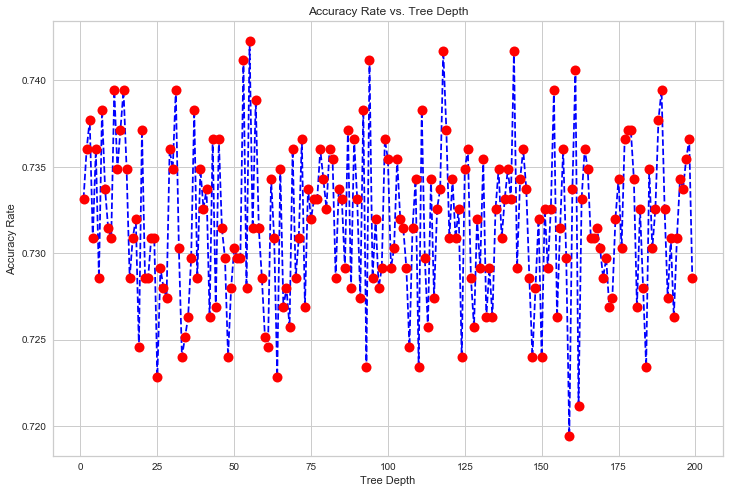

In [147]:
plt.figure(figsize=(12,8))
plt.plot(range(1,200),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Accuracy Rate')

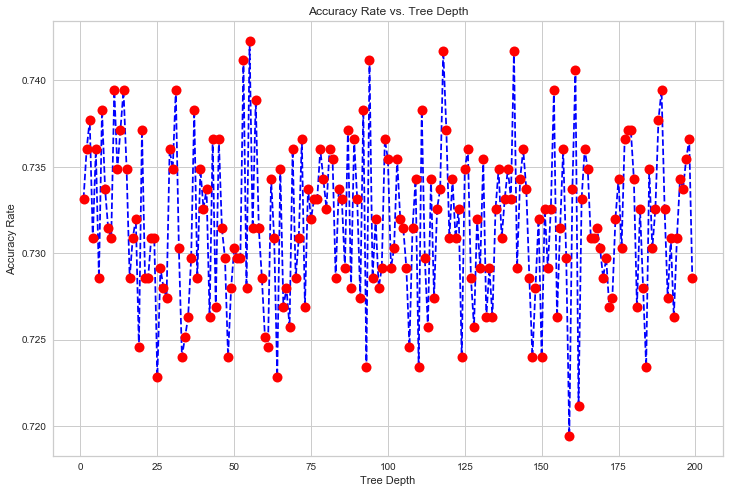

In [150]:
plt.figure(figsize=(12,8))
plt.plot(range(1,200),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Rate')

In [151]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)

Text(0, 0.5, 'Accuracy Rate')

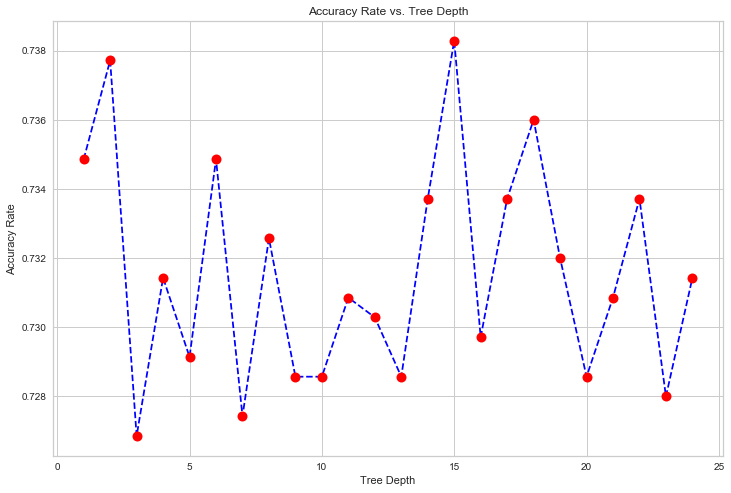

In [157]:
accuracy_rate = []

# Will take some time
for i in range(1,25):   
    dtree.fit(X_train, y_train) 
    accuracy_rate.append(dtree.score(X_test, y_test))
    
    
plt.figure(figsize=(12,8))
plt.plot(range(1,25),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy Rate')

In [162]:
optimal_parameters = {'DecisionTreeClassifier__max_depth': [15], 
              'DecisionTreeClassifier__min_samples_leaf':[1], 
             'DecisionTreeClassifier__min_samples_split': [2], 
             'DecisionTreeClassifier__random_state': [42]}
optimal_parameters


{'DecisionTreeClassifier__max_depth': [15],
 'DecisionTreeClassifier__min_samples_leaf': [1],
 'DecisionTreeClassifier__min_samples_split': [2],
 'DecisionTreeClassifier__random_state': [42]}

In [163]:
optimal_dtree = GridSearchCV(estimator=pipeline, param_grid=optimal_parameters, 
                                cv=10)

In [164]:
optimal_dtree.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('DecisionTreeClassifier',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fraction_

In [165]:

print('Accuracy of decision tree classifier on test set: {:.2f}'.format(optimal_dtree.score(X_test, y_test)))

Accuracy of decision tree classifier on test set: 0.73


### Decision Tree Feature Selection

In [166]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.features import RFECV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


from sklearn.tree import DecisionTreeClassifier



In [203]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
#print("Features:",[list(df_normalized_w_target.columns)[7:-1]])
#print("Num of Features:", fit.n_features_)
#print("Selected Features:", fit.support_)
#print("Feature Ranking:", fit.ranking_)
from pprint import pprint
feature_names = list(df_normalized_w_target.columns)[7:-1]
pprint(dict(zip(feature_names, clf.feature_importances_)))

#feature_list = pd.DataFrame(columns = (data.columns)[:-1])
feature_list = list(df_normalized_w_target.columns)[7:-1]
print(len(feature_list))

rfe = RFE(clf, 20)
fit = rfe.fit(X_train, y_train)


included_features = list(fit.support_)
print(len(included_features))

feature_ranking = list(fit.ranking_)
print(len(feature_ranking))

{'Hillshade_3pm': 0.025521688989605613,
 'Hillshade_9am': 0.06514089675037689,
 'Hillshade_Noon': 0.035283630154485136,
 'Horizontal_Distance_To_Fire_Points': 0.0736460062727714,
 'Horizontal_Distance_To_Roadways': 0.07842210976459574,
 'Soil_Type_1': 0.0017563059773879188,
 'Soil_Type_10': 0.00783927520246036,
 'Soil_Type_11': 0.001597458261351177,
 'Soil_Type_12': 0.008462841945307149,
 'Soil_Type_13': 0.0011290432522333888,
 'Soil_Type_14': 0.0,
 'Soil_Type_15': 0.0,
 'Soil_Type_16': 0.0015809504296398385,
 'Soil_Type_17': 0.00397098640892068,
 'Soil_Type_18': 0.0,
 'Soil_Type_19': 0.001109285869131416,
 'Soil_Type_2': 0.00345404852913302,
 'Soil_Type_20': 0.001231858964094942,
 'Soil_Type_21': 0.00020577506134001705,
 'Soil_Type_22': 0.0017375558054355735,
 'Soil_Type_23': 0.001554075858126616,
 'Soil_Type_24': 0.0005451296621758979,
 'Soil_Type_25': 0.0,
 'Soil_Type_26': 0.0,
 'Soil_Type_27': 0.0,
 'Soil_Type_28': 0.0,
 'Soil_Type_29': 0.0031803648547735915,
 'Soil_Type_3': 0.0151

*Can we use RFE for decision trees? Further research into downsides (if any) of this*

In [204]:
ft_df = {'Features': feature_list, "Included?": included_features, 'Ranking':feature_ranking }
list_of_log_features = pd.DataFrame(ft_df)
list_of_log_features.sort_values(by='Ranking')

Features  Included?  Ranking
0                            elevation       True        1
23                        Soil_Type_10       True        1
30                        Soil_Type_17       True        1
19                         Soil_Type_6       True        1
17                         Soil_Type_4       True        1
16                         Soil_Type_3       True        1
15                         Soil_Type_2       True        1
45                        Soil_Type_32       True        1
10                   Wilderness_Area_1       True        1
12                   Wilderness_Area_3       True        1
8                        Hillshade_3pm       True        1
7                       Hillshade_Noon       True        1
6                        Hillshade_9am       True        1
5      Horizontal_Distance_To_Roadways       True        1
4       vertical_distance_to_hydrology       True        1
3     horizontal_distance_to_hydrology       True        1
2                                slope       True        1
1                               aspect       True        1
9   Horizontal_Distance_To_Fire_Points       True        1
25                        Soil_Type_12       True        1
51                        Soil_Type_38      False        2
52                        Soil_Type_39      False        3
42                        Soil_Type_29      False        4
44                        Soil_Type_31      False        5
13                   Wilderness_Area_4      False        6
36                        Soil_Type_23      False        7
53                        Soil_Type_40      False        8
35                        Soil_Type_22      False        9
11                   Wilderness_Area_2      False       10
14                         Soil_Type_1      False       11
24                        Soil_Type_11      False       12
33                        Soil_Type_20      False       13
37                        Soil_Type_24      False       14
43                        Soil_Type_30      False       15
18                         Soil_Type_5      False       16
29                        Soil_Type_16      False       17
32                        Soil_Type_19      False       18
46                        Soil_Type_33      False       19
47                        Soil_Type_34      False       20
26                        Soil_Type_13      False       21
34                        Soil_Type_21      False       22
31                        Soil_Type_18      False       23
41                        Soil_Type_28      False       24
48                        Soil_Type_35      False       25
49                        Soil_Type_36      False       26
50                        Soil_Type_37      False       27
20                         Soil_Type_7      False       28
21                         Soil_Type_8      False       29
40                        Soil_Type_27      False       30
22                         Soil_Type_9      False       31
38                        Soil_Type_25      False       32
39                        Soil_Type_26      False       33
28                        Soil_Type_15      False       34
27                        Soil_Type_14      False       35

In [224]:
dtree_feat = []
for i in list_of_log_features: 
    if list_of_log_features['Ranking'] == 1 :
        print(list_of_log_features)



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11    10
12     1
13     6
14    11
15     1
16     1
17     1
18    16
19     1
20    28
21    29
22    31
23     1
24    12
25     1
26    21
27    35
28    34
29    17
30     1
31    23
32    18
33    13
34    22
35     9
36     7
37    14
38    32
39    33
40    30
41    24
42     4
43    15
44     5
45     1
46    19
47    20
48    25
49    26
50    27
51     2
52     3
53     8
Name: Ranking, dtype: int64

## Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [170]:
rfc_pred = rfc.predict(X_test)

### Random Forest Model Performance

In [171]:
y_pred =  rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.81


In [172]:
print(confusion_matrix(y_test,rfc_pred))

[[194  41   0   0   7   0  20]
 [ 60 151   6   0  40  10   3]
 [  0   0 171  20   9  33   0]
 [  0   0   0 262   0   5   0]
 [  0  12   6   0 210   6   0]
 [  0   1  30   8   4 205   0]
 [ 13   0   0   0   0   0 223]]


In [173]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.73      0.74      0.73       262
           2       0.74      0.56      0.64       270
           3       0.80      0.73      0.77       233
           4       0.90      0.98      0.94       267
           5       0.78      0.90      0.83       234
           6       0.79      0.83      0.81       248
           7       0.91      0.94      0.93       236

    accuracy                           0.81      1750
   macro avg       0.81      0.81      0.81      1750
weighted avg       0.81      0.81      0.80      1750



**Using Random Forest Classifiers and including all 54 variables, we get an accuracy rate of about 81%.**

### Random Forest Parameter Tuning

In [174]:
# Random forest baseline performance
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [175]:
print(confusion_matrix(y_test,rfc_pred))

[[194  41   0   0   7   0  20]
 [ 60 151   6   0  40  10   3]
 [  0   0 171  20   9  33   0]
 [  0   0   0 262   0   5   0]
 [  0  12   6   0 210   6   0]
 [  0   1  30   8   4 205   0]
 [ 13   0   0   0   0   0 223]]


In [176]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.73      0.74      0.73       262
           2       0.74      0.56      0.64       270
           3       0.80      0.73      0.77       233
           4       0.90      0.98      0.94       267
           5       0.78      0.90      0.83       234
           6       0.79      0.83      0.81       248
           7       0.91      0.94      0.93       236

    accuracy                           0.81      1750
   macro avg       0.81      0.81      0.81      1750
weighted avg       0.81      0.81      0.80      1750



In [177]:
y_pred =  rfc.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.80


In [178]:
#from sklearn.metrics import roc_curve, auc
#false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
#roc_auc = auc(false_positive_rate, true_positive_rate)
#roc_auc

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())


Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [76]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [77]:
# Use the random grid to search for best hyperparameters
from sklearn.ensemble import RandomForestRegressor
# First create the base model to tune
rfr = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 43.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [79]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [80]:
#apply these and compare results
# Random forest peak performance
rfc_peak = RandomForestClassifier(n_estimators=400, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = None, bootstrap = False)
rfc_peak.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
rfc_pred_peak = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred_peak))

[[193  40   0   0   8   0  21]
 [ 64 153   7   0  36   8   2]
 [  0   0 172  18   7  36   0]
 [  0   0   0 262   0   5   0]
 [  1  12   5   0 210   6   0]
 [  0   2  32   8   4 202   0]
 [ 16   0   0   0   0   0 220]]


In [82]:
print(classification_report(y_test,rfc_pred_peak))

              precision    recall  f1-score   support

           1       0.70      0.74      0.72       262
           2       0.74      0.57      0.64       270
           3       0.80      0.74      0.77       233
           4       0.91      0.98      0.94       267
           5       0.79      0.90      0.84       234
           6       0.79      0.81      0.80       248
           7       0.91      0.93      0.92       236

    accuracy                           0.81      1750
   macro avg       0.80      0.81      0.80      1750
weighted avg       0.80      0.81      0.80      1750



In [83]:
y_pred_peak =  rfc_peak.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rfc_peak.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.82


### Random Forest Parameter Tuning

In [182]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15, 20, 30, 40, None], #setting this so as not to create a tree that's too big
    #'max_features': [2, 3, 4, 10],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'min_samples_split': [2, 30, 40],
    'n_estimators': [10, 20, 100, 200, 300, 400]
}


In [183]:
# Create a based model
rfc = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [184]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  5.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [185]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [186]:
best_grid = grid_search.best_estimator_
best_grid



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=40, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [188]:
y_pred =  grid_search.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(grid_search.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.81


Text(0, 0.5, 'Accuracy Rate')

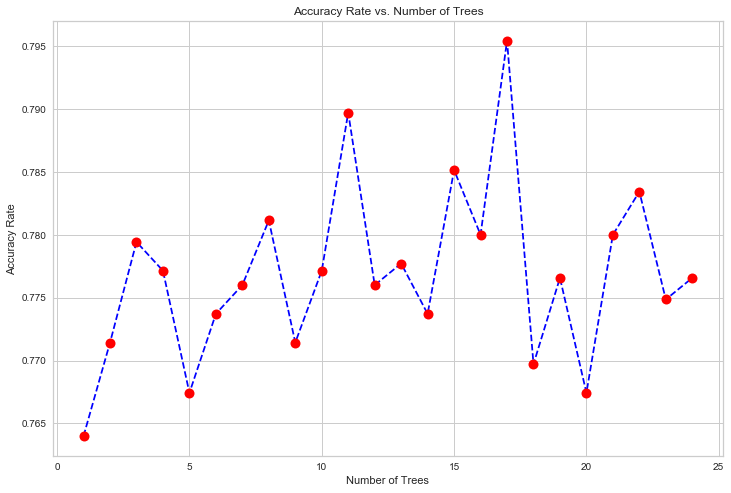

In [192]:
accuracy_rate = []

# Will take some time
for i in range(1,25):   
    rfc.fit(X_train, y_train) 
    accuracy_rate.append(rfc.score(X_test, y_test))
    
    
plt.figure(figsize=(12,8))
plt.plot(range(1,25),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Rate')

In [198]:
optimal_param_grid = {
    'bootstrap': [True],
    'max_depth': [40], #setting this so as not to create a tree that's too big
    #'max_features': [2, 3, 4, 10],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [17]
}

In [199]:
grid_search = GridSearchCV(estimator = rfc, param_grid = optimal_param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [200]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [201]:
y_pred =  grid_search.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(grid_search.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.79


Text(0, 0.5, 'Accuracy Rate')

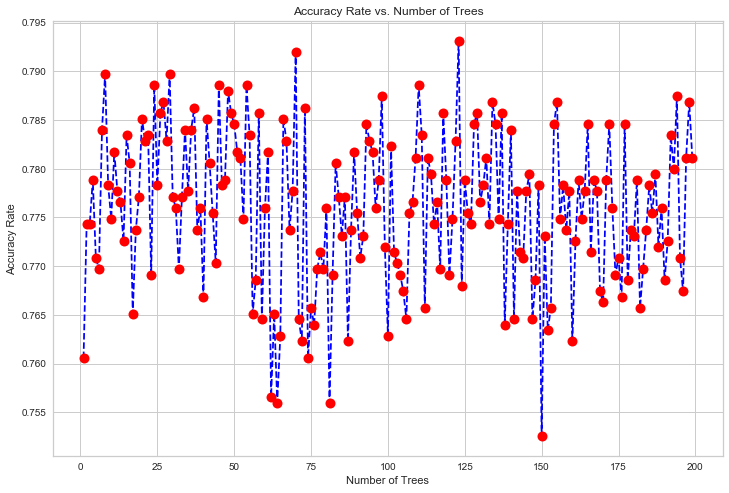

In [202]:
accuracy_rate = []

# Will take some time
for i in range(1,200):   
    rfc.fit(X_train, y_train) 
    accuracy_rate.append(rfc.score(X_test, y_test))
    
    
plt.figure(figsize=(12,8))
plt.plot(range(1,200),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy Rate')

## Blended Model

### Categorical vs Non-Categorical Data 

In [93]:
#get the original dataset and split the cols into categorical vs non-cat
pd.set_option('display.max_columns', None)
df_normalized_w_target.head()

1    2    3    4    5    6    7  elevation    aspect     slope  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368684  0.141667  0.045455   
1  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.365683  0.155556  0.030303   
2  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.472736  0.386111  0.136364   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.463232  0.430556  0.272727   
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.368184  0.125000  0.030303   

   horizontal_distance_to_hydrology  vertical_distance_to_hydrology  \
0                          0.184681                        0.223514   
1                          0.151754                        0.215762   
2                          0.191840                        0.307494   
3                          0.173228                        0.375969   
4                          0.109520                        0.222222   

   Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                         0.071659       0.870079        0.913386   
1                         0.054798       0.866142        0.925197   
2                         0.446817       0.921260        0.937008   
3                         0.434172       0.937008        0.937008   
4                         0.054939       0.866142        0.921260   

   Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area_1  \
0       0.582677                            0.875366                1.0   
1       0.594488                            0.867838                1.0   
2       0.531496                            0.853339                1.0   
3       0.480315                            0.865886                1.0   
4       0.590551                            0.860449                1.0   

   Wilderness_Area_2  Wilderness_Area_3  Wilderness_Area_4  Soil_Type_1  \
0                0.0                0.0                0.0          0.0   
1                0.0                0.0                0.0          0.0   
2                0.0                0.0                0.0          0.0   
3                0.0                0.0                0.0          0.0   
4                0.0                0.0                0.0          0.0   

   Soil_Type_2  Soil_Type_3  Soil_Type_4  Soil_Type_5  Soil_Type_6  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Soil_Type_7  Soil_Type_8  Soil_Type_9  Soil_Type_10  Soil_Type_11  \
0          0.0          0.0          0.0           0.0           0.0   
1          0.0          0.0          0.0           0.0           0.0   
2          0.0          0.0          0.0           0.0           0.0   
3          0.0          0.0          0.0           0.0           0.0   
4          0.0          0.0          0.0           0.0           0.0   

   Soil_Type_12  Soil_Type_13  Soil_Type_14  Soil_Type_15  Soil_Type_16  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           1.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_17  Soil_Type_18  Soil_Type_19  Soil_Type_20  Soil_Type_21  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_22  Soil_Type_23  Soil_Type_24  Soil_Type_25  Soil_Type_26  \
0  

In [94]:
cat_data = df_normalized_w_target[['Wilderness_Area_1','Wilderness_Area_2','Wilderness_Area_3','Wilderness_Area_4', 'Soil_Type_1', 'Soil_Type_2',
                                 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 
                                 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14',
                                'Soil_Type_15',
                                'Soil_Type_16',
                                'Soil_Type_17',
                                'Soil_Type_18',
                                'Soil_Type_19',
                                'Soil_Type_20',
                                'Soil_Type_21',
                                'Soil_Type_22',
                                'Soil_Type_23',
                                'Soil_Type_24',
                                'Soil_Type_25',
                                'Soil_Type_26',
                                'Soil_Type_27',
                                'Soil_Type_28',
                                'Soil_Type_29',
                                'Soil_Type_30',
                                'Soil_Type_31',
                                'Soil_Type_32',
                                'Soil_Type_33',
                                'Soil_Type_34',
                                'Soil_Type_35',
                                'Soil_Type_36',
                                'Soil_Type_37',
                                'Soil_Type_38',
                                'Soil_Type_39',
                                'Soil_Type_40', 
                                'Cover_Type']]

In [95]:
cat_data.head()
#num_cols = df_normalized_w_target._get_numeric_data().columns
#num_cols
#this doesnt work as even the binary variables are technically numeric

Wilderness_Area_1  Wilderness_Area_2  Wilderness_Area_3  Wilderness_Area_4  \
0                1.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                1.0                0.0                0.0                0.0   
3                1.0                0.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   Soil_Type_1  Soil_Type_2  Soil_Type_3  Soil_Type_4  Soil_Type_5  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Soil_Type_6  Soil_Type_7  Soil_Type_8  Soil_Type_9  Soil_Type_10  \
0          0.0          0.0          0.0          0.0           0.0   
1          0.0          0.0          0.0          0.0           0.0   
2          0.0          0.0          0.0          0.0           0.0   
3          0.0          0.0          0.0          0.0           0.0   
4          0.0          0.0          0.0          0.0           0.0   

   Soil_Type_11  Soil_Type_12  Soil_Type_13  Soil_Type_14  Soil_Type_15  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           1.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_16  Soil_Type_17  Soil_Type_18  Soil_Type_19  Soil_Type_20  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_21  Soil_Type_22  Soil_Type_23  Soil_Type_24  Soil_Type_25  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_26  Soil_Type_27  Soil_Type_28  Soil_Type_29  Soil_Type_30  \
0           0.0           0.0           0.0           1.0           0.0   
1           0.0           0.0           0.0           1.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           1.0   
4           0.0           0.0           0.0           1.0           0.0   

   Soil_Type_31  Soil_Type_32  Soil_Type_33  Soil_Type_34  Soil_Type_35  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_36  Soil_Type_37  Soil_Type_38  Soil_Type_39  Soil_Type_40  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0         

In [96]:
non_cat_data = df_normalized_w_target[['elevation', 'aspect', 'slope', 'vertical_distance_to_hydrology', 
                                       'horizontal_distance_to_hydrology', 'Horizontal_Distance_To_Roadways', 
                                       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 
                                       'Cover_Type']]
non_cat_data.head()

elevation    aspect     slope  vertical_distance_to_hydrology  \
0   0.368684  0.141667  0.045455                        0.223514   
1   0.365683  0.155556  0.030303                        0.215762   
2   0.472736  0.386111  0.136364                        0.307494   
3   0.463232  0.430556  0.272727                        0.375969   
4   0.368184  0.125000  0.030303                        0.222222   

   horizontal_distance_to_hydrology  Horizontal_Distance_To_Roadways  \
0                          0.184681                         0.071659   
1                          0.151754                         0.054798   
2                          0.191840                         0.446817   
3                          0.173228                         0.434172   
4                          0.109520                         0.054939   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.870079        0.913386       0.582677   
1       0.866142        0.925197       0.594488   
2       0.921260        0.937008       0.531496   
3       0.937008        0.937008       0.480315   
4       0.866142        0.921260       0.590551   

   Horizontal_Distance_To_Fire_Points  Cover_Type  
0                            0.875366           5  
1                            0.867838           5  
2                            0.853339           2  
3                            0.865886           2  
4                            0.860449           5

In [97]:
#define x and y 

# set target data  and x values for cat data
X_cat=cat_data[list(cat_data.columns)[0:-1]]
print(X_cat.shape)
X_cat.head()


(581012, 44)


Wilderness_Area_1  Wilderness_Area_2  Wilderness_Area_3  Wilderness_Area_4  \
0                1.0                0.0                0.0                0.0   
1                1.0                0.0                0.0                0.0   
2                1.0                0.0                0.0                0.0   
3                1.0                0.0                0.0                0.0   
4                1.0                0.0                0.0                0.0   

   Soil_Type_1  Soil_Type_2  Soil_Type_3  Soil_Type_4  Soil_Type_5  \
0          0.0          0.0          0.0          0.0          0.0   
1          0.0          0.0          0.0          0.0          0.0   
2          0.0          0.0          0.0          0.0          0.0   
3          0.0          0.0          0.0          0.0          0.0   
4          0.0          0.0          0.0          0.0          0.0   

   Soil_Type_6  Soil_Type_7  Soil_Type_8  Soil_Type_9  Soil_Type_10  \
0          0.0          0.0          0.0          0.0           0.0   
1          0.0          0.0          0.0          0.0           0.0   
2          0.0          0.0          0.0          0.0           0.0   
3          0.0          0.0          0.0          0.0           0.0   
4          0.0          0.0          0.0          0.0           0.0   

   Soil_Type_11  Soil_Type_12  Soil_Type_13  Soil_Type_14  Soil_Type_15  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           1.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_16  Soil_Type_17  Soil_Type_18  Soil_Type_19  Soil_Type_20  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_21  Soil_Type_22  Soil_Type_23  Soil_Type_24  Soil_Type_25  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_26  Soil_Type_27  Soil_Type_28  Soil_Type_29  Soil_Type_30  \
0           0.0           0.0           0.0           1.0           0.0   
1           0.0           0.0           0.0           1.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           1.0   
4           0.0           0.0           0.0           1.0           0.0   

   Soil_Type_31  Soil_Type_32  Soil_Type_33  Soil_Type_34  Soil_Type_35  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Soil_Type_36  Soil_Type_37  Soil_Type_38  Soil_Type_39  Soil_Type_40  
0           0.0           0.0           0.0           0.0           0.0  
1           0.0           0.0           0.0           0.0           0.0  
2           0.0           0.0           0.0           0.0           0.0  
3           0.0           0.0           0.0           0.0           0.0  
4           0.0           0.0           0.0

In [98]:
Y_cat=cat_data[list(cat_data.columns)[-1]]
print(Y_cat.shape)
Y_cat.head()
#Y

(581012,)


0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [99]:
#sample the data, 1000 per output
X_cat, y_cat = make_imbalance(X_cat, Y_cat,
                      sampling_strategy={1: 1000, 2: 1000, 3: 1000, 4:1000, 5:1000, 6:1000, 7:1000},
                      random_state=RANDOM_STATE)
#X_cat, y_cat

In [100]:
#define x and y 

# set target data  and x values for noncat data
X_noncat=non_cat_data[list(non_cat_data.columns)[0:-1]]
print(X_noncat.shape)
X_noncat.head()


(581012, 10)


elevation    aspect     slope  vertical_distance_to_hydrology  \
0   0.368684  0.141667  0.045455                        0.223514   
1   0.365683  0.155556  0.030303                        0.215762   
2   0.472736  0.386111  0.136364                        0.307494   
3   0.463232  0.430556  0.272727                        0.375969   
4   0.368184  0.125000  0.030303                        0.222222   

   horizontal_distance_to_hydrology  Horizontal_Distance_To_Roadways  \
0                          0.184681                         0.071659   
1                          0.151754                         0.054798   
2                          0.191840                         0.446817   
3                          0.173228                         0.434172   
4                          0.109520                         0.054939   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.870079        0.913386       0.582677   
1       0.866142        0.925197       0.594488   
2       0.921260        0.937008       0.531496   
3       0.937008        0.937008       0.480315   
4       0.866142        0.921260       0.590551   

   Horizontal_Distance_To_Fire_Points  
0                            0.875366  
1                            0.867838  
2                            0.853339  
3                            0.865886  
4                            0.860449

In [101]:
Y_noncat=non_cat_data[list(non_cat_data.columns)[-1]]
print(Y_noncat.shape)
Y_noncat.head()
#Y

(581012,)


0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [102]:
#sample the data, 1000 per output
X_noncat, y_noncat = make_imbalance(X_noncat, Y_noncat,
                      sampling_strategy={1: 1000, 2: 1000, 3: 1000, 4:1000, 5:1000, 6:1000, 7:1000},
                      random_state=RANDOM_STATE)
#X_noncat, y_noncat

In [103]:
#split into train and test
#split into training and testing
X_train_nc, X_test_nc, y_train_nc, y_test_nc = train_test_split(
    X_noncat, y_noncat, random_state=RANDOM_STATE)

In [104]:
#split into training and testing
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cat, y_cat, random_state=RANDOM_STATE)

### Random Forest Classifier for Categorical Data

In [105]:
rfc_c = RandomForestClassifier(n_estimators=400, min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= None,
 bootstrap= False)

#using the parameters from the first search


In [106]:
rfc_c.fit(X_train_c, y_train_c)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
y_pred_c =  rfc_c.predict(X_test_c)

In [108]:
print('Accuracy of random forest classifier on categorical data test set: {:.2f}'.format(rfc_c.score(X_test_c, y_test_c)))

Accuracy of random forest classifier on categorical data test set: 0.59


In [109]:
rfc_c = RandomForestClassifier(n_estimators=100)

In [110]:
rfc_c.fit(X_train_c, y_train_c)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
y_pred_c =  rfc_c.predict(X_test_c)

In [112]:
print('Accuracy of tuned random forest classifier on categorical data test set: {:.2f}'.format(rfc_c.score(X_test_c, y_test_c)))

Accuracy of tuned random forest classifier on categorical data test set: 0.59


### Logistic Regression for Non Categorical Variables

In [113]:
logreg_nc = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial').fit(X_train_nc, y_train_nc)
logreg_nc

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_pred_nc = logreg_nc.predict(X_test_nc)

In [115]:
print('Accuracy of logistic regression classifier on non-categorical test set: {:.2f}'.format(logreg_nc.score(X_test_nc, y_test_nc)))

Accuracy of logistic regression classifier on non-categorical test set: 0.61


In [117]:
#create a dictionary of our top 3models
estimators2=[('logreg', logreg_nc), ('rf', rfc_c)]

from sklearn.ensemble import VotingClassifier
#create our voting classifier, inputting our models
ensemble2 = VotingClassifier(estimators2, voting='hard')


In [118]:
#fit model to training data
ensemble2.fit(X_train_nc, y_train_nc)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                 

In [119]:
#test our model on the test data
ensemble2.score(X_test_nc, y_test_nc)

0.6982857142857143

In [120]:
#fit model to training data
ensemble2.fit(X_train_c, y_train_c)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                 

In [121]:
#test our model on the test data
ensemble2.score(X_test_c, y_test_c)

0.588

How should I define the Y var here? since the target stays the same but predictors change?
It seems like the random forest still performs best. Let's tryy a different approach to see if we can 